<a href="https://colab.research.google.com/github/jaesunkkk/22/blob/main/smote_LR_js.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141819 sha256=bd50b6e463c423e483d472b0f2089de7fb78306f4a11e5674e2c3b68209b3014
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [ ]:
!pip install tqdm

In [ ]:
!pip install transformers

In [ ]:
!pip install torch_optimizer

In [ ]:
from os.path import join as opj
import os
import sys
import pickle
import re
import random
import argparse

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, accuracy_score

from transformers import BertTokenizer, BertPreTrainedModel
import transformers
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch.nn as nn
from torch.cuda.amp import GradScaler, autocast
import torch_optimizer as optim

In [ ]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()
sentence = "안녕하세요 저는 천재입니다."
temp_X = mecab.nouns(sentence)
temp_X

['안녕', '저', '천재']

In [ ]:
!pip install bayesian-optimization

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, f1_score, recall_score, precision_score, precision_recall_fscore_support
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pickle
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from scipy.sparse import hstack

from sklearn.linear_model import LogisticRegression


import lightgbm as lgb
from lightgbm import LGBMClassifier, plot_importance
from bayes_opt import BayesianOptimization
from scipy.stats.mstats import gmean

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/통계청/1. 실습용자료.txt',sep='|',encoding='cp949')

In [ ]:
sample_df = pd.DataFrame(columns=['AI_id','digit_1','digit_2','digit_3'])

for g in df['digit_3'].unique():
    k=len(df[df['digit_3']==g])
    if k < 1000:
      temp_df= df.query('digit_3==@g').sample(n = k)
      sample_df=pd.concat([sample_df,temp_df])

    else:
      temp_df = df.query('digit_3==@g').sample(n=1000) ## 그룹별 데이터 추출 및 4000개 비복원 추출
      sample_df=pd.concat([sample_df,temp_df]) ## 데이터 추가

sample_df.reset_index(drop=True) ## 인덱스 초기화

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0368253,S,95,952,카센타에서,일반인대상으로,자동차수리
1,id_0955972,S,95,952,카센타에서,고객을 대상으로,자동차 특정부분 정비
2,id_0374058,S,95,952,사업장에서,자동차 종합수리,자동차정비
3,id_0573838,S,95,952,매장에서,고객의뢰받아,자동차 래핑
4,id_0148626,S,95,952,카센타에서,자동차전문수리,내장수리.타이어
...,...,...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서,LED광원과식물재배기술,온실환경제어시스템
144604,id_0436665,B,5,51,무연탄,"발파, 생산",NaN
144605,id_0756750,C,12,120,"잎담배, 판상엽","가공, 궐련","차세대상품, 차세대제조담배"
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기","원료투입, 슬러리제조",NaN


In [ ]:
sample_df=sample_df.reset_index(drop=True)
df=sample_df.copy()

In [ ]:
df

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0368253,S,95,952,카센타에서,일반인대상으로,자동차수리
1,id_0955972,S,95,952,카센타에서,고객을 대상으로,자동차 특정부분 정비
2,id_0374058,S,95,952,사업장에서,자동차 종합수리,자동차정비
3,id_0573838,S,95,952,매장에서,고객의뢰받아,자동차 래핑
4,id_0148626,S,95,952,카센타에서,자동차전문수리,내장수리.타이어
...,...,...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서,LED광원과식물재배기술,온실환경제어시스템
144604,id_0436665,B,5,51,무연탄,"발파, 생산",NaN
144605,id_0756750,C,12,120,"잎담배, 판상엽","가공, 궐련","차세대상품, 차세대제조담배"
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기","원료투입, 슬러리제조",NaN


In [ ]:
df = df.fillna(' ')

In [ ]:
df['text'] = df['text_obj']+" "+ df["text_mthd"]+" "+ df["text_deal"]

df

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal,text
0,id_0368253,S,95,952,카센타에서,일반인대상으로,자동차수리,카센타에서 일반인대상으로 자동차수리
1,id_0955972,S,95,952,카센타에서,고객을 대상으로,자동차 특정부분 정비,카센타에서 고객을 대상으로 자동차 특정부분 정비
2,id_0374058,S,95,952,사업장에서,자동차 종합수리,자동차정비,사업장에서 자동차 종합수리 자동차정비
3,id_0573838,S,95,952,매장에서,고객의뢰받아,자동차 래핑,매장에서 고객의뢰받아 자동차 래핑
4,id_0148626,S,95,952,카센타에서,자동차전문수리,내장수리.타이어,카센타에서 자동차전문수리 내장수리.타이어
...,...,...,...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서,LED광원과식물재배기술,온실환경제어시스템,사업장에서 LED광원과식물재배기술 온실환경제어시스템
144604,id_0436665,B,5,51,무연탄,"발파, 생산",,"무연탄 발파, 생산"
144605,id_0756750,C,12,120,"잎담배, 판상엽","가공, 궐련","차세대상품, 차세대제조담배","잎담배, 판상엽 가공, 궐련 차세대상품, 차세대제조담배"
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기","원료투입, 슬러리제조",,"담배잎, 담배잎줄기 원료투입, 슬러리제조"


In [ ]:
df.drop(['text_obj','text_mthd','text_deal'], axis=1, inplace=True)

In [ ]:
df

,AI_id,digit_1,digit_2,digit_3,text
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리.타이어
...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서 LED광원과식물재배기술 온실환경제어시스템
144604,id_0436665,B,5,51,"무연탄 발파, 생산"
144605,id_0756750,C,12,120,"잎담배, 판상엽 가공, 궐련 차세대상품, 차세대제조담배"
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기 원료투입, 슬러리제조"


In [ ]:
df

,AI_id,digit_1,digit_2,digit_3,text
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리.타이어
...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서 LED광원과식물재배기술 온실환경제어시스템
144604,id_0436665,B,5,51,"무연탄 발파, 생산"
144605,id_0756750,C,12,120,"잎담배, 판상엽 가공, 궐련 차세대상품, 차세대제조담배"
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기 원료투입, 슬러리제조"


In [ ]:
df['category_id'] = df['digit_3'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]
df.head(20)

,AI_id,digit_1,digit_2,digit_3,text,category_id
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리,0
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비,0
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비,0
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑,0
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리.타이어,0
5,id_0470789,S,95,952,"세차장 왁스,걸레 손세차",0
6,id_0487421,S,95,952,"카센타에서 일반차량 자동차흠집 수리,점검",0
7,id_0115526,S,95,952,사업장에서 고객을대상으로 자동차전문수리,0
8,id_0562263,S,95,952,"카센타 자동차,내장수리 내장전문수리타이어경정비",0
9,id_0295854,S,95,952,카센타에서 일반고객을 대상으로 자동차부품수리,0


In [ ]:
data=df.copy()

In [ ]:
data

,AI_id,digit_1,digit_2,digit_3,text,category_id
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리,0
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비,0
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비,0
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑,0
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리.타이어,0
...,...,...,...,...,...,...
144603,id_0699947,C,26,266,사업장에서 LED광원과식물재배기술 온실환경제어시스템,222
144604,id_0436665,B,5,51,"무연탄 발파, 생산",223
144605,id_0756750,C,12,120,"잎담배, 판상엽 가공, 궐련 차세대상품, 차세대제조담배",224
144606,id_0992753,C,12,120,"담배잎, 담배잎줄기 원료투입, 슬러리제조",224


In [ ]:
df['text'].nunique()

133225

In [ ]:
df=df.drop_duplicates(['text'], keep='first')

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
category_id_df = df[['digit_3', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,digit_3,category_id
0,952,0
934,472,1
1911,467,2
2891,475,3
3873,872,4
...,...,...
133188,843,220
133193,601,221
133213,266,222
133221,51,223


In [ ]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'digit_3']].values)
id_to_category

{0: 952,
 1: 472,
 2: 467,
 3: 475,
 4: 872,
 5: 291,
 6: 561,
 7: 107,
 8: 841,
 9: 423,
 10: 102,
 11: 474,
 12: 856,
 13: 529,
 14: 473,
 15: 761,
 16: 911,
 17: 562,
 18: 221,
 19: 961,
 20: 292,
 21: 477,
 22: 969,
 23: 949,
 24: 471,
 25: 551,
 26: 464,
 27: 493,
 28: 259,
 29: 732,
 30: 478,
 31: 912,
 32: 422,
 33: 222,
 34: 855,
 35: 320,
 36: 711,
 37: 465,
 38: 582,
 39: 721,
 40: 863,
 41: 559,
 42: 729,
 43: 141,
 44: 476,
 45: 461,
 46: 452,
 47: 953,
 48: 682,
 49: 339,
 50: 862,
 51: 466,
 52: 281,
 53: 712,
 54: 492,
 55: 752,
 56: 203,
 57: 681,
 58: 901,
 59: 742,
 60: 713,
 61: 592,
 62: 340,
 63: 261,
 64: 463,
 65: 262,
 66: 411,
 67: 163,
 68: 424,
 69: 243,
 70: 521,
 71: 851,
 72: 106,
 73: 421,
 74: 479,
 75: 941,
 76: 902,
 77: 311,
 78: 468,
 79: 204,
 80: 72,
 81: 181,
 82: 662,
 83: 852,
 84: 641,
 85: 239,
 86: 453,
 87: 251,
 88: 103,
 89: 762,
 90: 202,
 91: 151,
 92: 462,
 93: 653,
 94: 233,
 95: 161,
 96: 861,
 97: 101,
 98: 620,
 99: 733,
 100: 104,


In [ ]:
category_to_id

{11: 174,
 12: 197,
 14: 188,
 20: 171,
 31: 199,
 32: 179,
 51: 223,
 61: 209,
 62: 207,
 71: 121,
 72: 80,
 80: 218,
 101: 97,
 102: 10,
 103: 88,
 104: 100,
 105: 135,
 106: 72,
 107: 7,
 108: 178,
 111: 148,
 112: 110,
 120: 224,
 131: 158,
 132: 107,
 133: 177,
 134: 103,
 139: 111,
 141: 43,
 142: 215,
 143: 180,
 144: 122,
 151: 91,
 152: 182,
 161: 95,
 162: 115,
 163: 67,
 171: 108,
 172: 138,
 179: 129,
 181: 81,
 182: 204,
 191: 195,
 192: 203,
 201: 151,
 202: 90,
 203: 56,
 204: 79,
 205: 157,
 211: 206,
 212: 187,
 213: 201,
 221: 18,
 222: 33,
 231: 156,
 232: 120,
 233: 94,
 239: 85,
 241: 130,
 242: 104,
 243: 69,
 251: 87,
 252: 198,
 259: 28,
 261: 63,
 262: 65,
 263: 113,
 264: 149,
 265: 152,
 266: 222,
 271: 142,
 272: 141,
 273: 193,
 274: 162,
 281: 52,
 282: 196,
 283: 166,
 284: 114,
 285: 146,
 289: 131,
 291: 5,
 292: 20,
 301: 202,
 302: 145,
 303: 116,
 304: 217,
 311: 77,
 312: 192,
 313: 185,
 319: 167,
 320: 35,
 331: 123,
 332: 194,
 333: 169,
 334: 15

In [ ]:
df.groupby('digit_3').category_id.count()

digit_3
11     393
12     244
14     177
20     121
31      13
      ... 
951    889
952    934
953    947
961    953
969    938
Name: category_id, Length: 225, dtype: int64

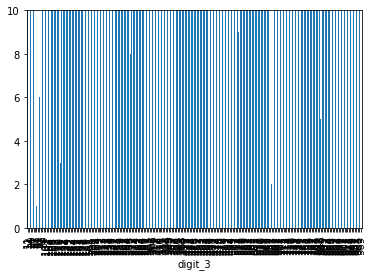

In [ ]:
df.groupby('digit_3').category_id.count().plot.bar(ylim=(0,10))

In [ ]:
spe_char = "[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》●○#-]"
spe_char_list = list(spe_char)

In [ ]:
def apply_replacement(org_df, preprocess_func):

    pre_df = org_df
    pre_df['text'] = pre_df['text'].apply(lambda x: preprocess_func(x))
    return pre_df 

In [ ]:
import re

In [ ]:
%%time
def del_spe_char(mms):

    mms = re.sub(spe_char, '', mms)
    return mms
    
df = apply_replacement(df, del_spe_char)

CPU times: user 412 ms, sys: 4.59 ms, total: 416 ms
Wall time: 685 ms


In [ ]:
df

,AI_id,digit_1,digit_2,digit_3,text,category_id
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리,0
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비,0
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비,0
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑,0
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리타이어,0
...,...,...,...,...,...,...
133220,id_0699947,C,26,266,사업장에서 LED광원과식물재배기술 온실환경제어시스템,222
133221,id_0436665,B,5,51,무연탄 발파 생산,223
133222,id_0756750,C,12,120,잎담배 판상엽 가공 궐련 차세대상품 차세대제조담배,224
133223,id_0992753,C,12,120,담배잎 담배잎줄기 원료투입 슬러리제조,224


In [ ]:
df['category_id'].value_counts()

141    998
20     996
49     996
32     994
7      994
      ... 
205      3
224      3
219      2
209      1
223      1
Name: category_id, Length: 225, dtype: int64

## 오버샘플링 (단어 위치바꾸는거로 샘플수 8이하인 것들: 복붙해서 만들고 smote-> 800개)

In [ ]:
a=df.groupby('digit_3').category_id.count().reset_index()

In [ ]:
a #category_id 열이 count수임

,digit_3,category_id
0,11,393
1,12,244
2,14,177
3,20,121
4,31,13
...,...,...
220,951,889
221,952,934
222,953,947
223,961,953


In [ ]:
b = a.loc[a['category_id'] < 6]

In [ ]:
b

,digit_3,category_id
6,51,1
7,61,1
11,80,3
22,120,3
138,495,3
164,652,2
197,843,5


In [ ]:
df.loc[df['digit_3']==51]

,AI_id,digit_1,digit_2,digit_3,text,category_id
133221,id_0436665,B,5,51,무연탄 발파 생산,223


In [ ]:
df.loc[df['digit_3']==61]

,AI_id,digit_1,digit_2,digit_3,text,category_id
132587,id_0052204,B,6,61,광산에서 채굴하여 철광생산,209


In [ ]:
df.loc[df['digit_3']==80]

,AI_id,digit_1,digit_2,digit_3,text,category_id
133183,id_0788303,B,8,80,사업장에서 해외광물자원개발아프리카 금채굴,218
133184,id_0717543,B,8,80,사업장에서 수수료 또는 계약에의거 광물원유등 지원탐사 서비스,218
133185,id_0173101,B,8,80,사업장 자원유전에너지개발 유전운영관련서비스업,218


In [ ]:
df.loc[df['digit_3']==120]

,AI_id,digit_1,digit_2,digit_3,text,category_id
133222,id_0756750,C,12,120,잎담배 판상엽 가공 궐련 차세대상품 차세대제조담배,224
133223,id_0992753,C,12,120,담배잎 담배잎줄기 원료투입 슬러리제조,224
133224,id_0904129,C,12,120,향료 재료투입정제혼합출하 전자담배 액상,224


In [ ]:
df.loc[df['digit_3']==495]

,AI_id,digit_1,digit_2,digit_3,text,category_id
132507,id_0038322,H,49,495,원유를 가지고 정유를 저장하는 석유파이프라인수송 서비스,205
132508,id_0484519,H,49,495,경질유 송유관을 이용하여 파이프라인운송,205
132509,id_0436154,H,49,495,유류저장소 파이프라인 운송,205


In [ ]:
df.loc[df['digit_3']==652]

,AI_id,digit_1,digit_2,digit_3,text,category_id
133186,id_0179327,K,65,652,보험사에서 보험사간에 계약에의거 재보험서비스,219
133187,id_0858355,K,65,652,사무실에서 보험사대상 생명보험 재보험,219


In [ ]:
df.loc[df['digit_3']==843]

,AI_id,digit_1,digit_2,digit_3,text,category_id
133188,id_0313320,O,84,843,민방위 교육 민방위교육 훈련 시민생활안전체험 민방위교육관리 시민생활안전체험,220
133189,id_0246271,O,84,843,병무청 모병징병 병무행정서비스,220
133190,id_0247360,O,84,843,병무청에서 병무행정업무로 병역관련서비스,220
133191,id_0246352,O,84,843,병무청에서 병무행정서비스 병무행정,220
133192,id_0247845,O,84,843,병무청 육해공군민방위대 국가방위수행,220


random sample (사용 X)------------------------------------------------------------

In [ ]:
def random_swap(words, n):
	new_words = words.copy()
	for _ in range(n):
		new_words = swap_word(new_words)

	return new_words

def swap_word(new_words):
	random_idx_1 = random.randint(0, len(new_words)-1)
	random_idx_2 = random_idx_1
	counter = 0

	while random_idx_2 == random_idx_1:
		random_idx_2 = random.randint(0, len(new_words)-1)
		counter += 1
		if counter > 3:
			return new_words

	new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1]
	return new_words

In [ ]:
def EDA(sent, alpha_rs, num_aug):
	sentence = sent
	words = sentence.split(' ')
	words = [word for word in words if word is not ""]
	num_words = len(words)

	augmented_sentences = []
	num_new_per_technique = num_aug

	n_rs = max(1, int(alpha_rs*num_words))
	
	# rs
	for _ in range(num_new_per_technique):
		a_words = random_swap(words, n_rs)
		augmented_sentences.append(" ".join(a_words))

	augmented_sentences.append(sentence)

	return augmented_sentences

In [ ]:
EDA(df['text'][0],0.1,20)

['내장수리 특정부분을 전문수리 자동차 카센타에서',
 '전문수리 특정부분을 카센타에서 자동차 내장수리',
 '카센타에서 특정부분을 내장수리 자동차 전문수리',
 '내장수리 특정부분을 전문수리 자동차 카센타에서',
 '카센타에서 특정부분을 전문수리 내장수리 자동차',
 '카센타에서 자동차 전문수리 특정부분을 내장수리',
 '카센타에서 내장수리 전문수리 자동차 특정부분을',
 '카센타에서 특정부분을 내장수리 자동차 전문수리',
 '카센타에서 특정부분을 전문수리 내장수리 자동차',
 '특정부분을 카센타에서 전문수리 자동차 내장수리',
 '자동차 특정부분을 전문수리 카센타에서 내장수리',
 '카센타에서 자동차 전문수리 특정부분을 내장수리',
 '카센타에서 전문수리 특정부분을 자동차 내장수리',
 '특정부분을 카센타에서 전문수리 자동차 내장수리',
 '특정부분을 카센타에서 전문수리 자동차 내장수리',
 '자동차 특정부분을 전문수리 카센타에서 내장수리',
 '특정부분을 카센타에서 전문수리 자동차 내장수리',
 '카센타에서 자동차 전문수리 특정부분을 내장수리',
 '카센타에서 전문수리 특정부분을 자동차 내장수리',
 '내장수리 특정부분을 전문수리 자동차 카센타에서',
 '카센타에서 특정부분을 전문수리 자동차 내장수리']

In [ ]:
import random
import pickle
import re

----------------------------------------------

In [ ]:
df1=df.copy()

In [ ]:
df1

,AI_id,digit_1,digit_2,digit_3,text,category_id
0,id_0368253,S,95,952,카센타에서 일반인대상으로 자동차수리,0
1,id_0955972,S,95,952,카센타에서 고객을 대상으로 자동차 특정부분 정비,0
2,id_0374058,S,95,952,사업장에서 자동차 종합수리 자동차정비,0
3,id_0573838,S,95,952,매장에서 고객의뢰받아 자동차 래핑,0
4,id_0148626,S,95,952,카센타에서 자동차전문수리 내장수리타이어,0
...,...,...,...,...,...,...
133220,id_0699947,C,26,266,사업장에서 LED광원과식물재배기술 온실환경제어시스템,222
133221,id_0436665,B,5,51,무연탄 발파 생산,223
133222,id_0756750,C,12,120,잎담배 판상엽 가공 궐련 차세대상품 차세대제조담배,224
133223,id_0992753,C,12,120,담배잎 담배잎줄기 원료투입 슬러리제조,224


In [ ]:
for i in range(5):
  df1=df1.append({'digit_3' : 51 , 'text' : '무연탄 발파 생산','category_id': 223} , ignore_index=True)
  df1=df1.append({'digit_3' : 61 , 'text' : '광산에서 채굴하여 철광생산','category_id': 209} , ignore_index=True)
  
for i in range(2):
  df1=df1.append({'digit_3' : 652 , 'text' : '사무실에서 보험사대상 생명보험 재보험','category_id': 219} , ignore_index=True)
  df1=df1.append({'digit_3' : 652 , 'text' : '보험사에서 보험사간에 계약에의거 재보험서비스','category_id': 219} , ignore_index=True)

df1=df1.append({'digit_3' : 80 , 'text' : '사업장에서 해외광물자원개발아프리카 금채굴','category_id': 218} , ignore_index=True)
df1=df1.append({'digit_3' : 80 , 'text' : '사업장 자원유전에너지개발 유전운영관련서비스업','category_id': 218} , ignore_index=True)
df1=df1.append({'digit_3' : 80 , 'text' : '사업장에서 수수료 또는 계약에의거 광물원유등 지원탐사 서비스','category_id': 218} , ignore_index=True)

df1=df1.append({'digit_3' : 120 , 'text' : '잎담배 판상엽 가공 궐련 차세대상품 차세대제조담배','category_id': 224} , ignore_index=True)
df1=df1.append({'digit_3' : 120 , 'text' : '담배잎 담배잎줄기 원료투입 슬러리제조','category_id': 224} , ignore_index=True)
df1=df1.append({'digit_3' : 120 , 'text' : '향료 재료투입정제혼합출하 전자담배 액상','category_id': 224} , ignore_index=True)

df1=df1.append({'digit_3' : 495 , 'text' : '유류저장소 파이프라인 운송','category_id': 205} , ignore_index=True)
df1=df1.append({'digit_3' : 495 , 'text' : '원유를 가지고 정유를 저장하는 석유파이프라인수송 서비스','category_id': 205} , ignore_index=True)
df1=df1.append({'digit_3' : 495 , 'text' : '경질유 송유관을 이용하여 파이프라인운송','category_id': 205} , ignore_index=True)

df1=df1.append({'digit_3' : 843 , 'text' : '민방위 교육 민방위교육 훈련 시민생활안전체험 민방위교육관리 시민생활안전체험','category_id': 220} , ignore_index=True)


In [ ]:
df1

,AI_id,digit_1,digit_2,digit_3,text,category_id
0,id_0368253,S,95.0,952,카센타에서 일반인대상으로 자동차수리,0
1,id_0955972,S,95.0,952,카센타에서 고객을 대상으로 자동차 특정부분 정비,0
2,id_0374058,S,95.0,952,사업장에서 자동차 종합수리 자동차정비,0
3,id_0573838,S,95.0,952,매장에서 고객의뢰받아 자동차 래핑,0
4,id_0148626,S,95.0,952,카센타에서 자동차전문수리 내장수리타이어,0
...,...,...,...,...,...,...
133244,NaN,NaN,NaN,120,향료 재료투입정제혼합출하 전자담배 액상,224
133245,NaN,NaN,NaN,495,유류저장소 파이프라인 운송,205
133246,NaN,NaN,NaN,495,원유를 가지고 정유를 저장하는 석유파이프라인수송 서비스,205
133247,NaN,NaN,NaN,495,경질유 송유관을 이용하여 파이프라인운송,205


## 토큰화 추가 (명사로만 뽑아보던지, 형태소로 뽑고 불용어 제거)

In [ ]:
def noun_parsing(contents):
  mecab=Mecab()
  noun_data=' '.join(mecab.nouns(contents))
  return noun_data

In [ ]:
df1['noun_text']=df1['text'].apply(noun_parsing)

## 벡터화 tfidf, SMOTE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2),max_features=7000)
features = tfidf.fit_transform(df1.noun_text).toarray()

 # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df1.category_id 

In [ ]:
#features.shape 

In [ ]:
#category_to_id.items()

In [ ]:
#sorted(category_to_id.items())

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(features, labels)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', features.shape, labels.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X.shape, y.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y).value_counts())

##모델링

In [ ]:
labels

0           0
1           0
2           0
3           0
4           0
         ... 
122469    222
122470    223
122471    224
122472    224
122473    224
Name: category_id, Length: 113642, dtype: int64

In [ ]:
from sklearn.utils import class_weight

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.model_selection import cross_val_score


models = [
    MultinomialNB(),
    LogisticRegression(random_state=30, class_weight = 'balanced' ,max_iter=1000),

]

In [ ]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [ ]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model,features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

In [ ]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression    0.759482
MultinomialNB         0.725161
Name: accuracy, dtype: float64